In [8]:
import os
import json
from collections import defaultdict

# Specify the main directory containing all folders
main_directory = "./lighthouse"

# Store relevant information in a list
audit_data_list = []

# Store relevant JavaScript library information and count in a dictionary
js_libraries_data_dict = defaultdict(lambda: {"count": 0, "versions": set()})

# Define the target audits
target_audits = [
    "is-on-https",
    "third-party-summary",
    "csp-xss",
    "js-libraries",
    "uses-http2",
    "uses-passive-event-listeners",
    "is-crawlable",
    "robots-txt",
    "paste-preventing-inputs",
    "meta-viewport",  # very important for mobile user!
    "content-width",  # mobile user
    "viewport"        # mobile user
    "link-name",
    "unsized-images",
    "font-display",
    "redirects",
    "interactive",
    "total-blocking-time",
    "max-potential-fid",
    "first-contentful-paint",
    "largest-contentful-paint",
    "first-meaningful-paint",
]

# Traverse all folders in the main directory
for folder_name in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder_name)

    # Check if it's a folder
    if os.path.isdir(folder_path):
        # Traverse all files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".json"):
                # Build the full file path
                file_path = os.path.join(folder_path, filename)

                # Parse the JSON report
                with open(file_path, 'r', encoding='utf-8') as file:
                    report = json.load(file)

                # Extract information for target audits
                for audit_name in target_audits:
                    audit_data = report.get("audits", {}).get(audit_name, {})
                    score = audit_data.get("score")
                    requested_url = report.get("requestedUrl")
                    final_displayed_url = report.get("finalDisplayedUrl")

                    # Extract information from the "js-libraries" section
                    js_libraries_data = audit_data
                    if audit_name == "js-libraries" and js_libraries_data:
                        js_libraries_name = js_libraries_data.get("details", {}).get("items", [])
                        for library_info in js_libraries_name:
                            name = library_info.get("name")
                            version = library_info.get("version")

                            # Update count and versions in the dictionary
                            js_libraries_data_dict[name]["count"] += 1
                            js_libraries_data_dict[name]["versions"].add(version)

                    # Analyze redirection information
                    is_redirect = requested_url != final_displayed_url
                    redirects_to_https = requested_url.startswith("http://") and final_displayed_url.startswith("https://")

                    # Add information to the list
                    audit_data_list.append({
                        "audit_name": audit_name,
                        "score": score,
                        "requested_url": requested_url,
                        "final_displayed_url": final_displayed_url,
                        "is_redirect": is_redirect,
                        "redirects_to_https": redirects_to_https
                    })

In [36]:
import os
import json
from collections import defaultdict

# Specify the main directory containing all folders
main_directory = "./lighthouse"

# Store relevant information in a list
audit_data_list = []

# Store relevant JavaScript library information and count in a dictionary
js_libraries_data_dict = defaultdict(lambda: {"count": 0, "versions": defaultdict(int)})

# Define the target audits
target_audits = [
    "is-on-https",
    "third-party-summary",
    "csp-xss",
    "js-libraries",
    "uses-http2",
    "uses-passive-event-listeners",
    "is-crawlable",
    "robots-txt",
    "paste-preventing-inputs",
    "meta-viewport",  # very important for mobile user!
    "content-width",  # mobile user
    "viewport",       # mobile user
    "link-name",
    "unsized-images",
    "font-display",
    "redirects",
    "interactive",
    "total-blocking-time",
    "max-potential-fid",
    "first-contentful-paint",
    "largest-contentful-paint",
    "first-meaningful-paint",
]

# Traverse all folders in the main directory
for folder_name in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder_name)

    # Check if it's a folder
    if os.path.isdir(folder_path):
        # Traverse all files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".json"):
                # Build the full file path
                file_path = os.path.join(folder_path, filename)

                # Parse the JSON report
                with open(file_path, 'r', encoding='utf-8') as file:
                    report = json.load(file)

                # Extract information for target audits
                for audit_name in target_audits:
                    audit_data = report.get("audits", {}).get(audit_name, {})
                    score = audit_data.get("score")
                    requested_url = report.get("requestedUrl")
                    final_displayed_url = report.get("finalDisplayedUrl")

                    # Extract information from the "js-libraries" section
                    js_libraries_data_audit = audit_data
                    if audit_name == "js-libraries" and js_libraries_data_audit:
                        js_libraries_name = js_libraries_data_audit.get("details", {}).get("items", [])
                        for library_info in js_libraries_name:
                            name = library_info.get("name")
                            version = library_info.get("version")

                            # Update count and versions in the dictionary
                            js_libraries_data_dict[name]["count"] += 1
                            js_libraries_data_dict[name]["versions"][version] += 1

                    # Analyze redirection information
                    is_redirect = requested_url != final_displayed_url
                    redirects_to_https = requested_url.startswith("http://") and final_displayed_url.startswith("https://")

                    # Add information to the list
                    audit_data_list.append({
                        "audit_name": audit_name,
                        "score": score,
                        "requested_url": requested_url,
                        "final_displayed_url": final_displayed_url,
                        "is_redirect": is_redirect,
                        "redirects_to_https": redirects_to_https
                    })

# Save audit data as JSON
with open("audit_data.json", "w", encoding="utf-8") as audit_file:
    json.dump(audit_data_list, audit_file, ensure_ascii=False, indent=2)

# Convert sets to lists in js_libraries_data_dict
js_libraries_data_dict_serializable = {}
for name, data in js_libraries_data_dict.items():
    js_libraries_data_dict_serializable[name] = {
        "count": data["count"],
        "versions": dict(data["versions"])  # Convert defaultdict to regular dict
    }

# Save js_libraries_data_dict as JSON
with open("js_libraries_data.json", "w", encoding="utf-8") as js_libraries_dict_file:
    json.dump(js_libraries_data_dict_serializable, js_libraries_dict_file, indent=2)

print(f"JavaScript libraries data dictionary saved to js_libraries_data.json")


JavaScript libraries data dictionary saved to js_libraries_data.json


In [34]:
# # Save audit data as JSON
# with open("audit_data.json", "w", encoding="utf-8") as audit_file:
#     json.dump(audit_data_list, audit_file, ensure_ascii=False, indent=2)
# 
# # Convert sets to lists in js_libraries_data_dict
# js_libraries_data_dict_serializable = {}
# for name, data in js_libraries_data_dict.items():
#     js_libraries_data_dict_serializable[name] = {
#         "count": data["count"],
#         "versions": list(data["versions"])
#     }
# 
# # Save js_libraries_data_dict as JSON
# with open("js_libraries_data.json", "w", encoding="utf-8") as js_libraries_dict_file:
#     json.dump(js_libraries_data_dict_serializable, js_libraries_dict_file, indent=2)
# 
# print(f"JavaScript libraries data dictionary saved to js_libraries_data.json")

JavaScript libraries data dictionary saved to js_libraries_data.json


In [1]:
import json

# 读取 audit_data.json 文件
with open("audit_data.json", "r", encoding="utf-8") as audit_file:
    audit_data = json.load(audit_file)

# 读取 js_libraries_data.json 文件
with open("js_libraries_data.json", "r", encoding="utf-8") as js_libraries_file:
    js_libraries_data = json.load(js_libraries_file)

# 现在，你可以访问和处理这些数据，例如：
# 打印第一个 audit 数据
print("First audit data:")
print(audit_data[0])

# 打印 JavaScript libraries 数据
print("\nJavaScript libraries data:")
print(js_libraries_data)


First audit data:
{'audit_name': 'http-status-code', 'score': 1, 'requested_url': 'http://cgzf.sh.gov.cn/', 'final_displayed_url': 'http://cgzf.sh.gov.cn/', 'is_redirect': False, 'redirects_to_https': False}

JavaScript libraries data:
{'jQuery': {'count': 11346, 'versions': {'1.11.3': 654, '3.5.1': 448, '3.6.1': 203, '3.1.1': 44, '3.6.4': 118, '1.12.4': 869, '1.7.2': 333, '3.7.0': 177, '1.10.0': 1, '1.8.3': 910, '3.6.0': 1934, '2.2.4': 230, '2022.8.19': 23, '1.9.1': 682, '1.11.2': 141, '1.12.1': 76, '3.5.0': 92, '2.0.0': 19, '1.12.0': 111, '2.1.1': 93, '2.1.4': 110, '3.0.0': 20, '..': 103, 'null': 114, '1.4.2': 206, '1.6.2': 17, '1.11.0': 119, '1.11.1': 372, '9.9.9': 14, '1.4.1': 15, '1.10.2': 422, '1.10.1': 29, '3.4.1': 859, '1.8.0': 65, '1.7.1': 262, '1.8.2': 197, '1.2.3': 2, '1.3.1': 8, '1.4.4': 14, '3.6.3': 423, '10.0': 1, '3.3.1': 131, '3.7.1': 12, '3.2.1': 31, '3.1.0': 2, '2.2.3': 17, '1.42': 31, '1.4': 9, '2.2.1': 6, '1.9.0': 36, '1.6.4': 10, '3.6.6': 3, '3.0.01': 1, '1.12.3': 

In [5]:
audit_data

[{'audit_name': 'is-on-https',
  'score': 0,
  'requested_url': 'http://cgzf.sh.gov.cn/',
  'final_displayed_url': 'http://cgzf.sh.gov.cn/',
  'is_redirect': False,
  'redirects_to_https': False},
 {'audit_name': 'third-party-summary',
  'score': 0,
  'requested_url': 'http://cgzf.sh.gov.cn/',
  'final_displayed_url': 'http://cgzf.sh.gov.cn/',
  'is_redirect': False,
  'redirects_to_https': False},
 {'audit_name': 'csp-xss',
  'score': None,
  'requested_url': 'http://cgzf.sh.gov.cn/',
  'final_displayed_url': 'http://cgzf.sh.gov.cn/',
  'is_redirect': False,
  'redirects_to_https': False},
 {'audit_name': 'js-libraries',
  'score': None,
  'requested_url': 'http://cgzf.sh.gov.cn/',
  'final_displayed_url': 'http://cgzf.sh.gov.cn/',
  'is_redirect': False,
  'redirects_to_https': False},
 {'audit_name': 'uses-http2',
  'score': 0,
  'requested_url': 'http://cgzf.sh.gov.cn/',
  'final_displayed_url': 'http://cgzf.sh.gov.cn/',
  'is_redirect': False,
  'redirects_to_https': False},
 {'au

D:\zm157\AppData\Local\Temp\ipykernel_14524\2041338623.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=audit_scores, y=audit_names, palette="viridis")


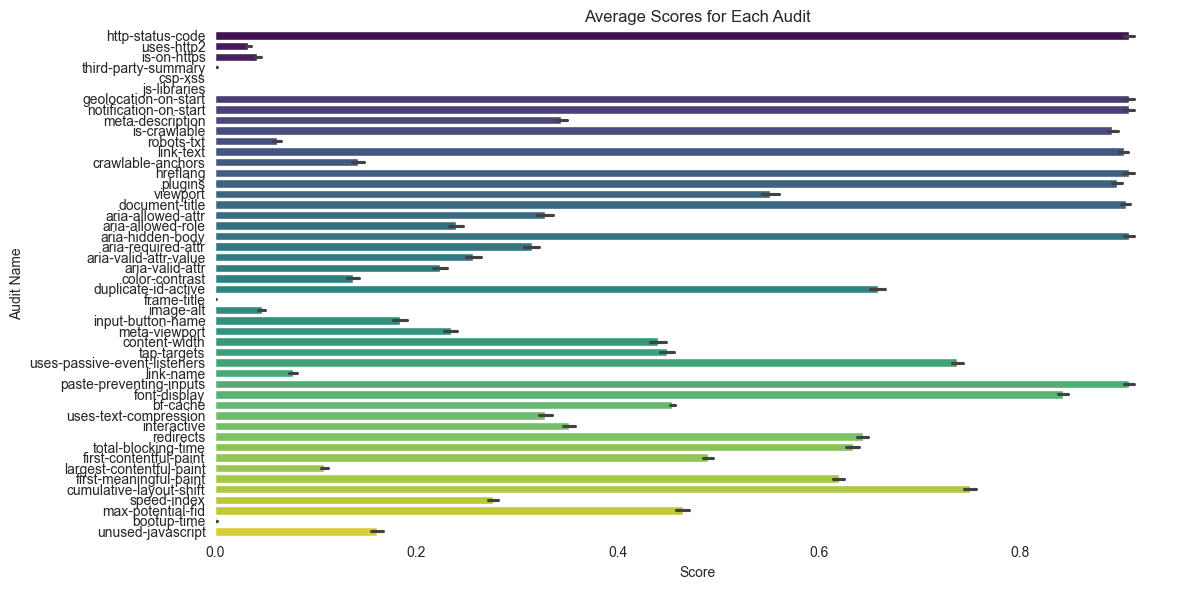

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 读取 audit_data.json 文件
with open("audit_data.json", "r", encoding="utf-8") as audit_file:
    audit_data = json.load(audit_file)

# 读取 js_libraries_data.json 文件
with open("js_libraries_data.json", "r", encoding="utf-8") as js_libraries_file:
    js_libraries_data = json.load(js_libraries_file)

# 示例：创建一个柱状图显示每个审核项目的平均分数
audit_names = [entry["audit_name"] for entry in audit_data]
audit_scores = [entry["score"] if entry["score"] is not None else 0 for entry in audit_data]

# 创建柱状图
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=audit_scores, y=audit_names, palette="viridis")

# 设置背景颜色为白色
ax1.set_facecolor('white')

# 设置其他图形属性
plt.xlabel("Score")
plt.ylabel("Audit Name")
plt.title("Average Scores for Each Audit")

# 调整布局并保存图形
plt.tight_layout()
plt.savefig("audit_scores.png", dpi=400)
plt.show()


D:\zm157\AppData\Local\Temp\ipykernel_7776\3136873883.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_top_10_libraries = sns.barplot(x=df_top_10_libraries['count'], y=df_top_10_libraries.index, palette="pastel")


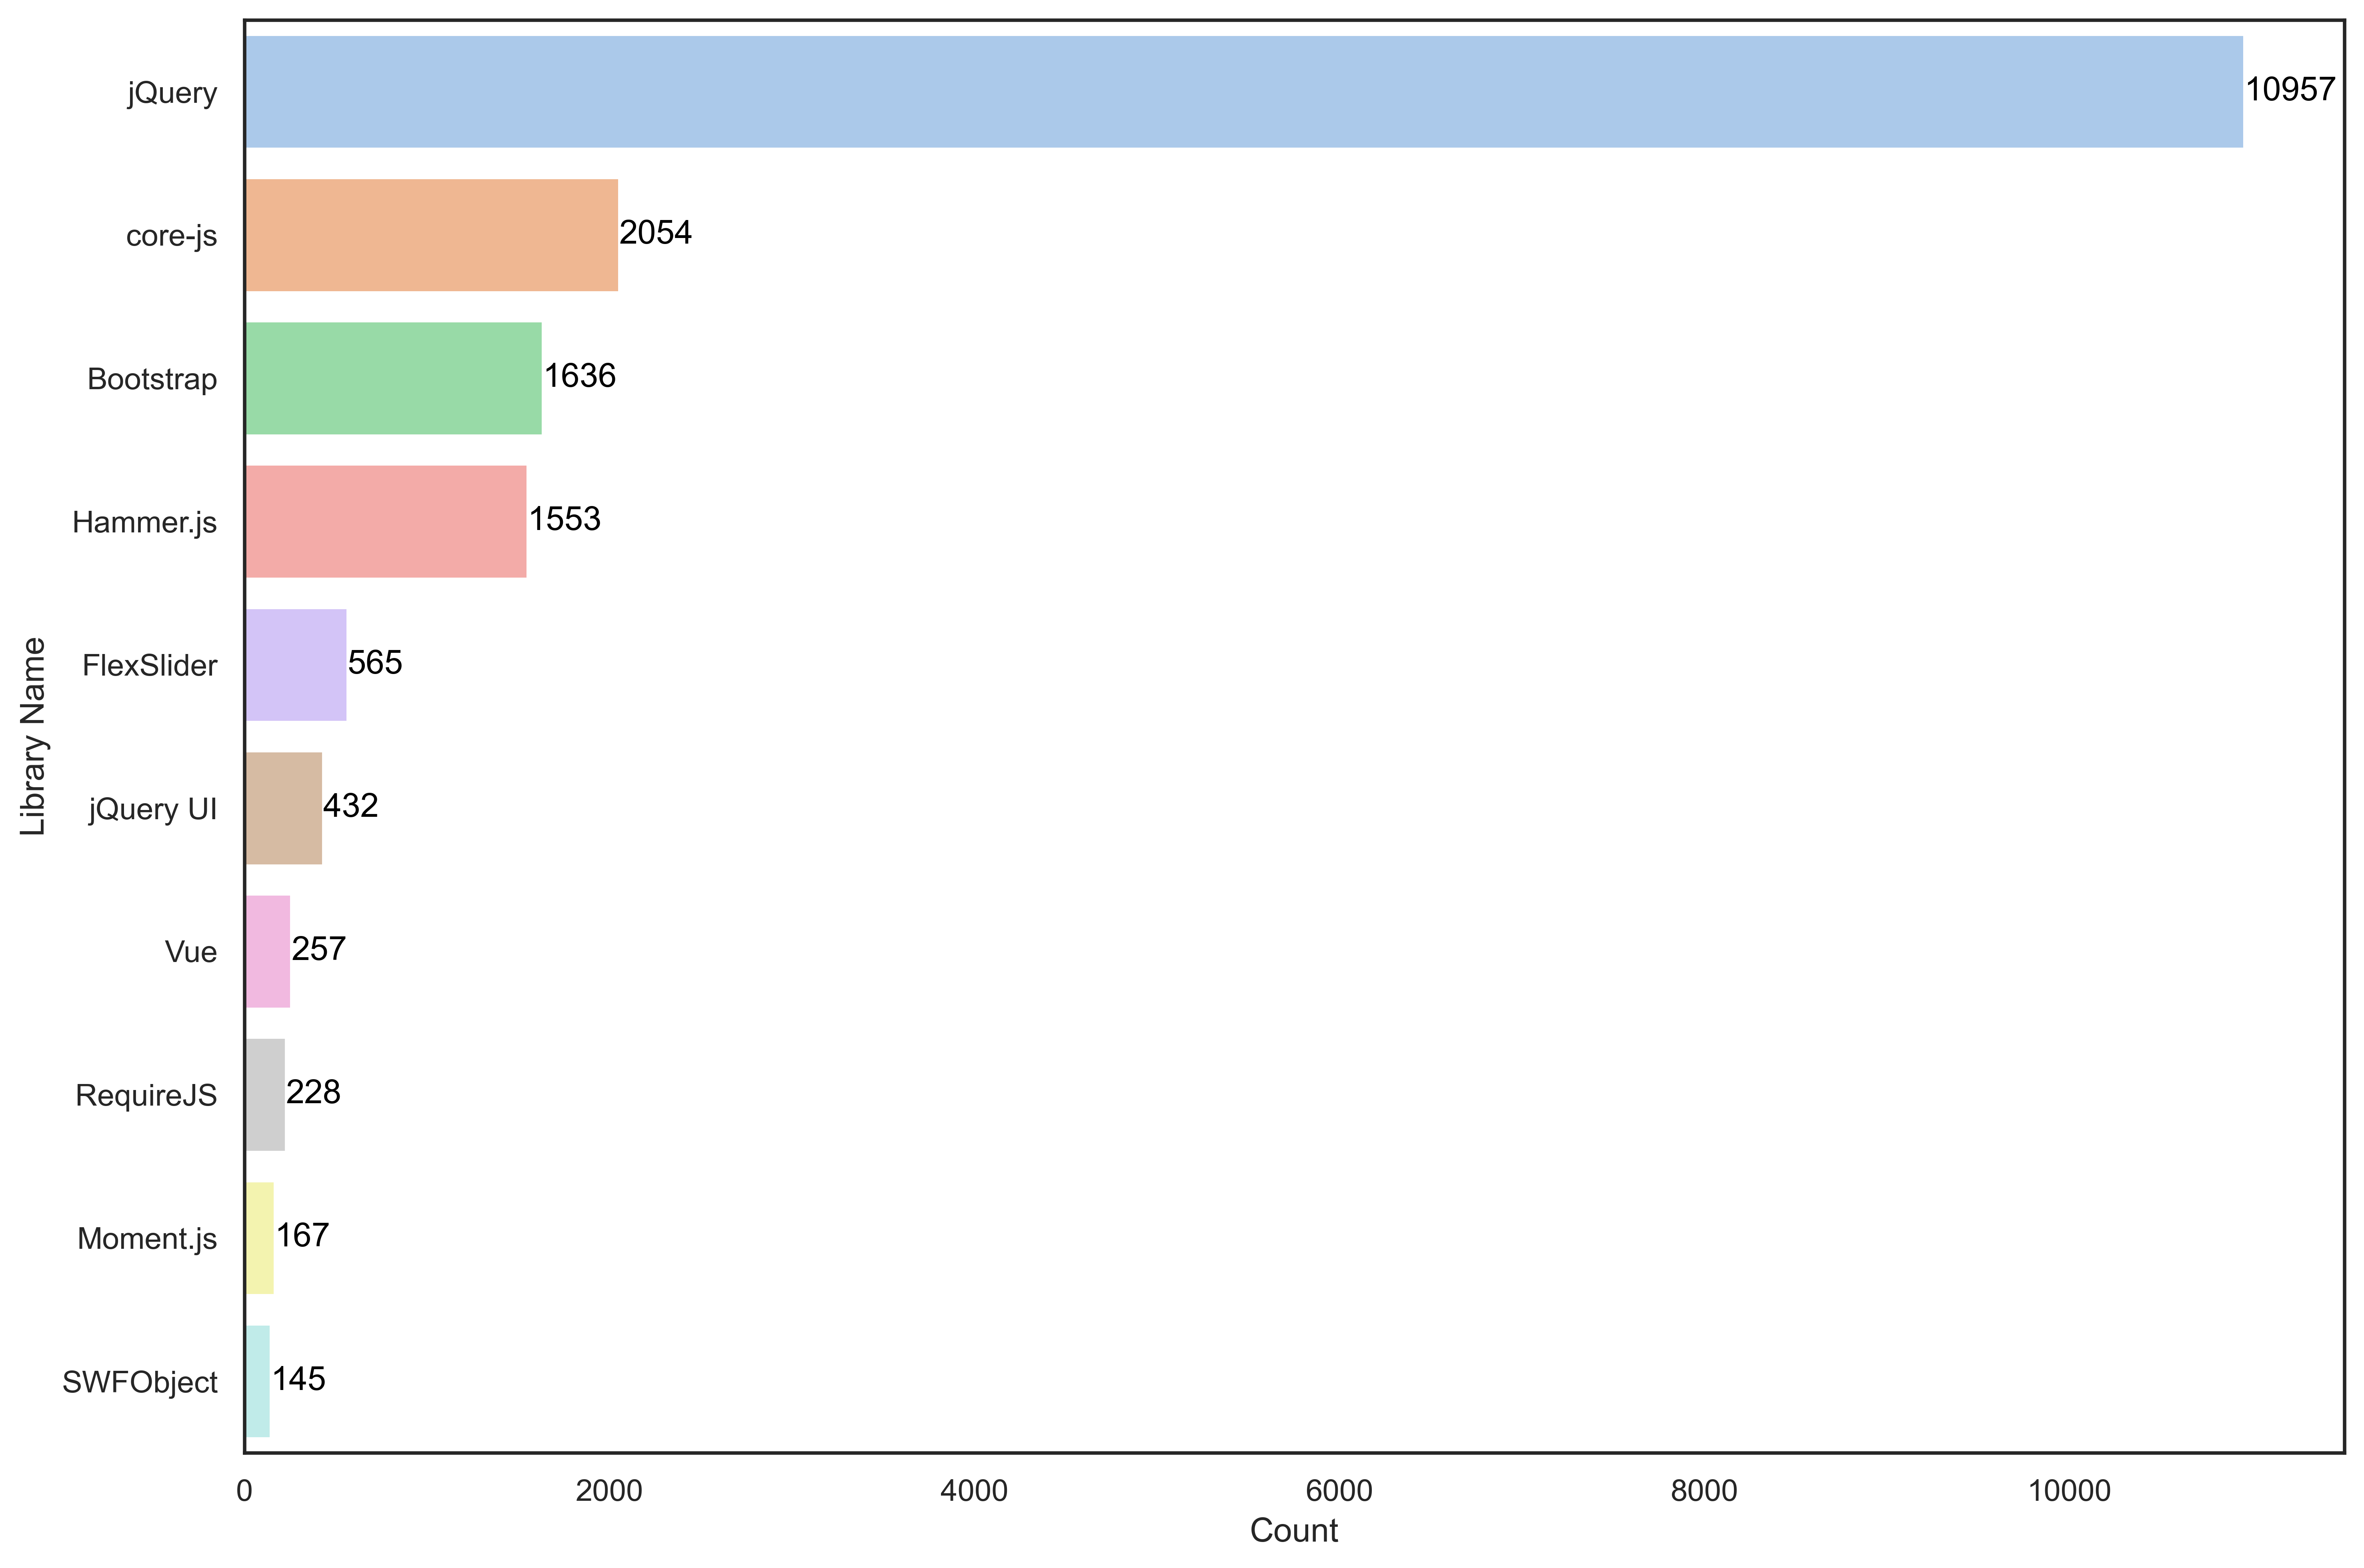

D:\zm157\AppData\Local\Temp\ipykernel_7776\3136873883.py:91: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.text(df_top_versions[version] + 0.1, i - 0.15, f"{int(df_top_versions[version])}", va='center', fontsize=10, color='black')
D:\PyCharmProject\WebsiteCollectAndAnalysis\venv\lib\site-packages\matplotlib\text.py:824: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
D:\PyCharmProject\WebsiteCollectAndAnalysis\venv\lib\site-packages\matplotlib\text.py:684: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(textobj.convert_xunits(textobj._x))


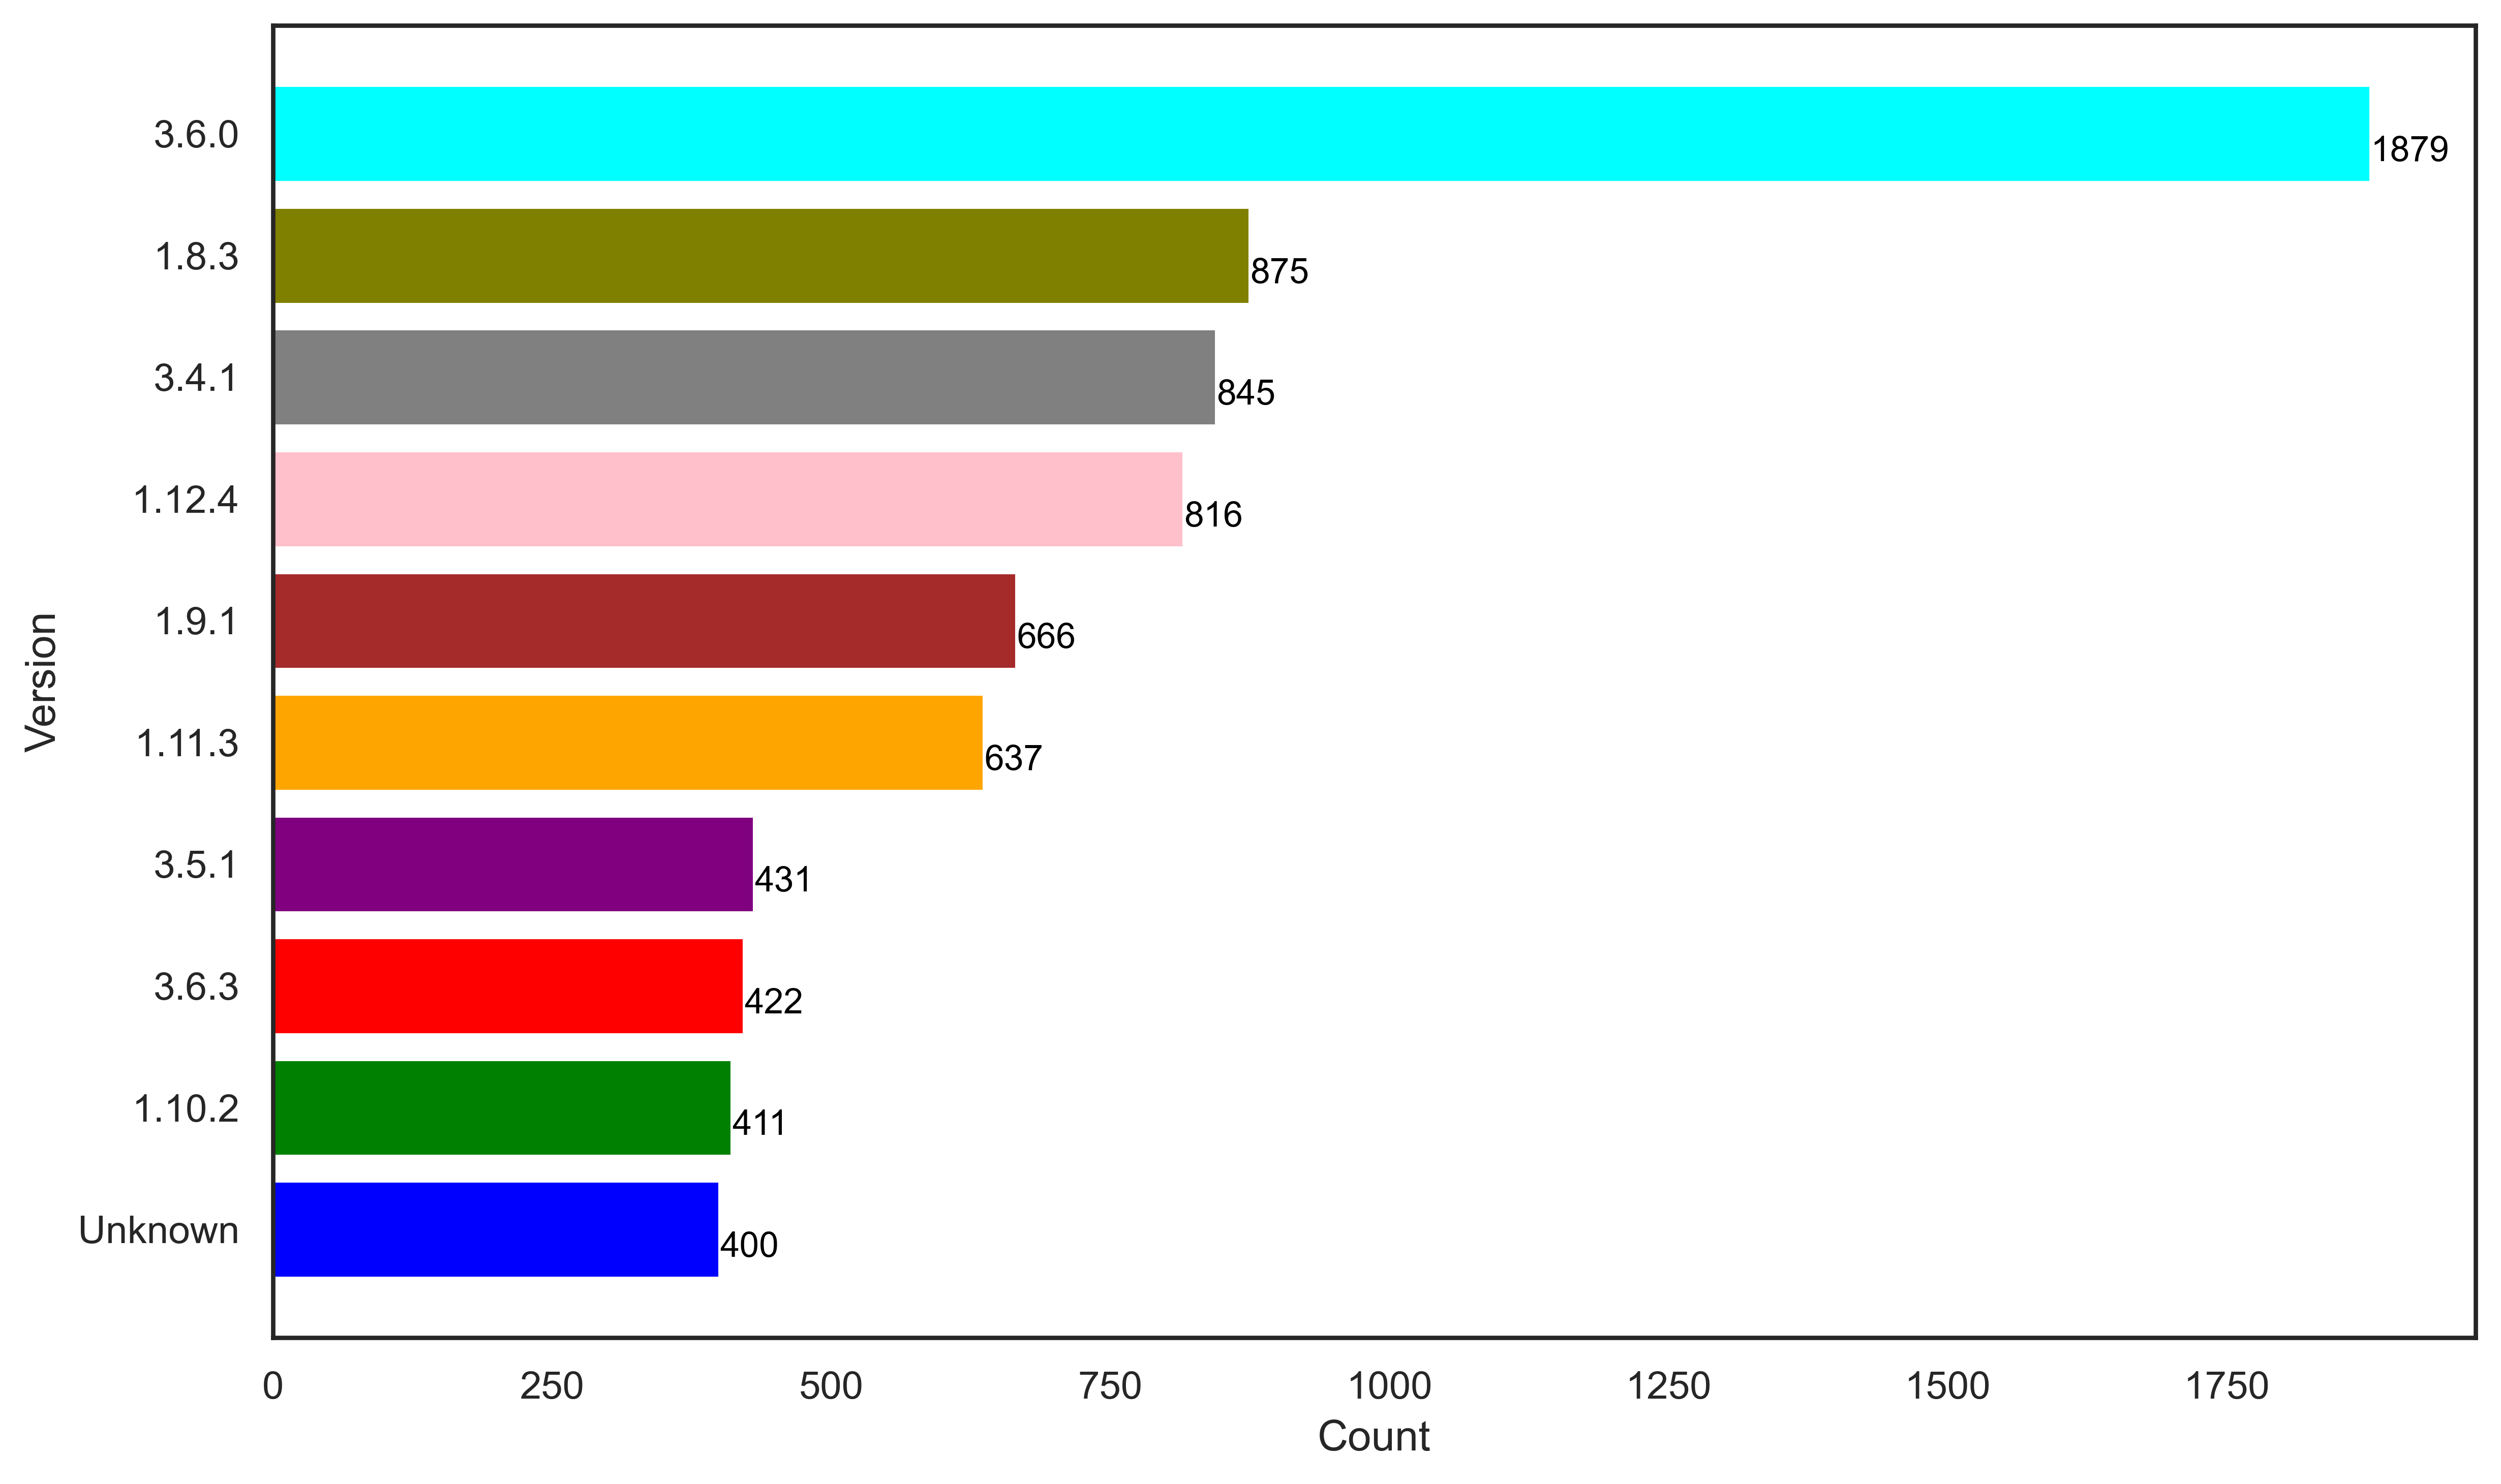

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style to whitegrid
sns.set(style="white")

# # Load audit_data.json and js_libraries_data.json
# with open("audit_data.json", "r", encoding="utf-8") as audit_file:
#     audit_data = json.load(audit_file)

with open("js_libraries_data.json", "r", encoding="utf-8") as js_libraries_file:
    js_libraries_data = json.load(js_libraries_file)

# Convert sets to lists in js_libraries_data_dict
js_libraries_data_dict = {}
for name, data in js_libraries_data.items():
    js_libraries_data_dict[name] = {
        "count": data["count"],
        "versions": data["versions"]
    }

sorted_libraries = sorted(js_libraries_data_dict.items(), key=lambda x: x[1]["count"], reverse=True)
top_libraries = sorted_libraries[:10]

top_libraries_versions = {}
for library_name, library_data in top_libraries:
    versions = library_data["versions"]
    sorted_versions = sorted(versions.items(), key=lambda x: x[1], reverse=True)
    top_versions = sorted_versions[:5]
    top_libraries_versions[library_name] = {"count": library_data["count"], "versions": dict(top_versions)}

# Create a DataFrame for all libraries
df_all_libraries = pd.DataFrame(js_libraries_data_dict).T
df_all_libraries_sorted = df_all_libraries.sort_values(by='count', ascending=False)

# Select only the top 10 libraries
df_top_10_libraries = df_all_libraries_sorted.head(10)

# Plot the usage counts for the top 10 libraries
plt.figure(figsize=(12, 8), dpi=500)
ax_top_10_libraries = sns.barplot(x=df_top_10_libraries['count'], y=df_top_10_libraries.index, palette="pastel")
ax_top_10_libraries.set_xlabel("Count")
ax_top_10_libraries.set_ylabel("Library Name")
ax_top_10_libraries.grid(False)
for i, v in enumerate(df_top_10_libraries['count']):
    ax_top_10_libraries.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.savefig("js_libraries_usage_top_10.png", dpi=500)
plt.show()

# Convert the data to a DataFrame for easy manipulation
df_versions = pd.DataFrame({library: versions['versions'] for library, versions in top_libraries_versions.items()}).T
df_versions.fillna(0, inplace=True)

# # Plot a stacked bar chart for version distribution
# plt.figure(figsize=(12, 8), dpi=500)
# ax = df_versions.plot(kind='bar', stacked=True, ax=plt.gca())
# ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
# ax.set_xlabel("Library Name")
# ax.set_ylabel("Count")
# # Remove grid background for the second plot
# ax.grid(False)
# plt.tight_layout()
# plt.savefig("top_js_libraries_version_distribution.png", dpi=500)
# plt.show()


# Set a more colorful and sci-style color palette
colors = plt.cm.viridis.colors

# 从源头选择 'jQuery' 的数据并填充缺失值
df_versions = pd.DataFrame({library: versions['versions'] for library, versions in sorted_libraries if library == 'jQuery'}).T
df_versions.fillna(0, inplace=True)

# Select only the top 10 versions
top_versions = df_versions.sum().nlargest(10).index
df_top_versions = df_versions[top_versions]

# Create a custom color mapping for each version
custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot the horizontal bar chart with the specified modifications
plt.figure(figsize=(10, 6), dpi=500)

# Iterate through each version in reverse order (from largest to smallest)
for i, version in enumerate(reversed(top_versions)):
    plt.barh(version, df_top_versions[version], color=custom_colors[i])
    plt.text(df_top_versions[version] + 0.1, i - 0.15, f"{int(df_top_versions[version])}", va='center', fontsize=10, color='black')

plt.xlabel("Count")
plt.ylabel("Version")
plt.tight_layout()
plt.savefig("jquery_version_horizontal_bar_with_values.png", dpi=500)
plt.show()

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have additional features for clustering (e.g., version distribution)
# Load additional features data or replace this with your actual data
additional_features = pd.read_csv("additional_features.csv")

# Merge the libraries data with additional features based on a common identifier
merged_data_cluster = pd.merge(df_all_libraries_sorted, additional_features, left_index=True, right_on="common_identifier", how="inner")

# Select features for clustering (you can customize this based on your data)
features_for_clustering = merged_data_cluster[["count", "feature1", "feature2"]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data_cluster["cluster"] = kmeans.fit_predict(scaled_features)

# Plot a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(merged_data_cluster["count"], merged_data_cluster["feature1"], merged_data_cluster["feature2"], c=merged_data_cluster["cluster"], cmap="viridis", s=50)
ax.set_xlabel("Count")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")
ax.set_title("Clustering of JavaScript Libraries")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'additional_features.csv'